In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('results/two_nodes_allreduce.csv', names=['Backend + Device', 'Tensor Size', 'World Size', 'Time'])
df

,Backend + Device,Tensor Size,World Size,Time
0,GLOO + CPU,512 KB,2,0.000873
1,GLOO + CPU,1 MB,2,0.001800
2,GLOO + CPU,10 MB,2,0.013400
3,GLOO + CPU,50 MB,2,0.047400
4,GLOO + CPU,100 MB,2,0.089700
...,...,...,...,...
58,NCCL + CUDA,10 MB,6,0.000341
59,NCCL + CUDA,50 MB,6,0.000796
60,NCCL + CUDA,100 MB,6,0.001310
61,NCCL + CUDA,500 MB,6,0.005160


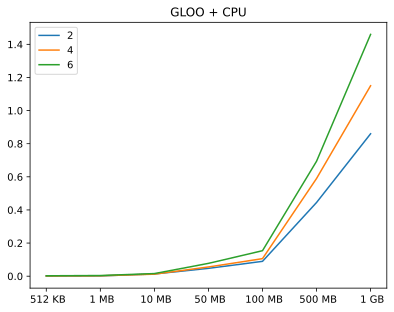

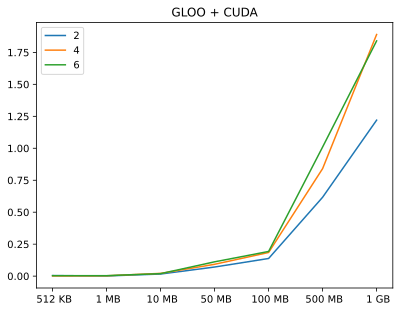

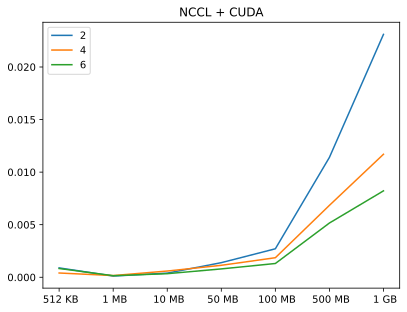

In [3]:
%config InlineBackend.figure_formats = ['svg']
for backend_device in df['Backend + Device'].unique():
    sub_df = df[df['Backend + Device'] == backend_device]
    # print(sub_df)
    plt.title(backend_device)
    for world_size in sub_df['World Size'].unique():
        sub_sub_df = sub_df[sub_df['World Size'] == world_size]
        plt.plot(sub_sub_df['Tensor Size'], sub_sub_df['Time'], label=f'{world_size}')
    plt.legend()
    plt.show()